# Boston house price 

In [1]:
from sklearn.datasets import load_boston, load_diabetes
from sklearn.linear_model import LinearRegression, Lasso
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Boston = load_boston()

In [3]:
X = Boston.data
y = Boston.target

In [4]:
reg = LinearRegression()
lasso_reg = Lasso(alpha=1)

In [5]:
reg.fit(X,y)
lasso_reg.fit(X,y)

Lasso(alpha=1)

In [6]:
for i in range (len(reg.coef_)):
    print(Boston.feature_names[i],':',round(reg.coef_[i],5))

CRIM : -0.10801
ZN : 0.04642
INDUS : 0.02056
CHAS : 2.68673
NOX : -17.76661
RM : 3.80987
AGE : 0.00069
DIS : -1.47557
RAD : 0.30605
TAX : -0.01233
PTRATIO : -0.95275
B : 0.00931
LSTAT : -0.52476


In [7]:
for i in range (len(lasso_reg.coef_)):
    print(Boston.feature_names[i],':',round(lasso_reg.coef_[i],5))

CRIM : -0.06344
ZN : 0.04916
INDUS : -0.0
CHAS : 0.0
NOX : -0.0
RM : 0.94981
AGE : 0.02091
DIS : -0.66879
RAD : 0.26421
TAX : -0.01521
PTRATIO : -0.72297
B : 0.00825
LSTAT : -0.76111


#### 해당 alpha값에서 13개의 가중치 중 3개 -> 0 , 10개의 변수만 사용되었다. 

10개의 변수 중 RM(방의 개수), DIS(일자리 중심가까지의 거리), LSTAT(저소득층 인구 비율)와 PTRATIO(교생 인구 비율)의 가중치가 가장 높게 책정되었다. 

In [8]:
lasso_reg.score(X,y)

0.6825842212709925

In [9]:
reg.score(X,y)

0.7406426641094095

#### lasso_reg.score은 실제 13개의 변수를 고려하였을 때(reg.score)보다 더 낮은 score값을 보이는 것을 확인할 수 있음(overfitting 방지)

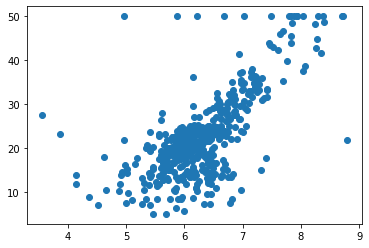

In [10]:
x=[i[5] for i in X]
plt.scatter(x,y)

#### 그래프 1. 가장 높은 가중치를 받은 RM(방의 갯수) 대비 Housing price 관계 그래프

#   

# Diabetes

In [40]:
Dia = load_diabetes()

In [41]:
Dia_X = Dia.data
Dia_y = Dia.target

In [42]:
Dia_reg = LinearRegression()
Dia_lasso_reg = Lasso(alpha =0.3)

In [43]:
Dia_reg.fit(Dia_X,Dia_y)
Dia_lasso_reg.fit(Dia_X,Dia_y)

Lasso(alpha=0.3)

In [44]:
Dia.feature_names = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

In [45]:
for i in range (len(Dia_reg.coef_)):
    print(Dia.feature_names[i],':',round(Dia_reg.coef_[i],5))

age : -10.0122
sex : -239.81909
bmi : 519.83979
bp : 324.39043
tc : -792.18416
ldl : 476.74584
hdl : 101.04457
tch : 177.06418
ltg : 751.27932
glu : 67.62539


In [46]:
for i in range (len(Dia_reg.coef_)):
    print(Dia.feature_names[i],':',round(Dia_lasso_reg.coef_[i],5))

age : 0.0
sex : -0.0
bmi : 504.74642
bp : 189.77655
tc : -0.0
ldl : -0.0
hdl : -112.57274
tch : 0.0
ltg : 438.79991
glu : 0.0


#### alpha = 0.3에서 10개의 가중치 중 6개 -> 0, 4개의 변수만 살아남음
bmi(체질량 지수), bp(혈압 수치), ltg(라모트리진 수치)와 정비례 관계를 보인다

In [47]:
Dia_lasso_reg.score(Dia_X,Dia_y)

0.47844693026055474

In [48]:
Dia_reg.score(Dia_X,Dia_y)

0.5177494254132934

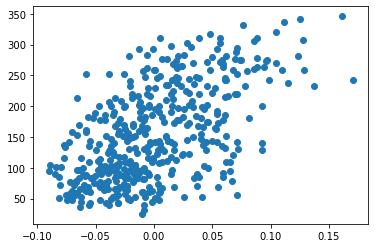

In [49]:
D_x=[i[2] for i in Dia_X]
plt.scatter(D_x,Dia_y)

#### 그래프 2. 가장 높은 가중치를 받은 bmi(체질량 지수)와 당뇨 수치(442명의 당뇨 환자 중)

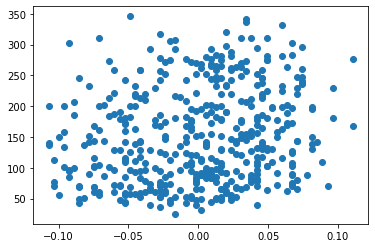

In [50]:
D_x=[i[0] for i in Dia_X]
plt.scatter(D_x,Dia_y)

#### 그래프 3. 가중치 0에 해당하는 age(나이)와 당뇨 수치(442명의 당뇨 환자 중)
뚜렷한 추세 없이 산개적으로 분포되어있음을 확인할 수 있다.